In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter
%matplotlib inline


## ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



import joblib

In [2]:

df = pd.read_csv("Heart_Disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Define the mappings

In [13]:
# Mappings based on UCI Heart Disease dataset documentation
sex_map = {0: 'Female', 1: 'Male'}
cp_map = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
}
fbs_map = {0: '≤ 120 mg/dl', 1: '> 120 mg/dl'}
restecg_map = {
    0: 'Normal',
    1: 'ST-T Wave Abnormality',
    2: 'Left Ventricular Hypertrophy'
}
exang_map = {0: 'No', 1: 'Yes'}
slope_map = {
    0: 'Upsloping',
    1: 'Flat',
    2: 'Downsloping'
}
thal_map = {
    1: 'Normal',
    2: 'Fixed Defect',
    3: 'Reversible Defect'
}
target_map = {0: 'No Disease', 1: 'Disease'}


#### Apply the mappings

In [16]:
df['sex'] = df['sex'].map(sex_map)
df['cp'] = df['cp'].map(cp_map)
df['fbs'] = df['fbs'].map(fbs_map)
df['restecg'] = df['restecg'].map(restecg_map)
df['exang'] = df['exang'].map(exang_map)
df['slope'] = df['slope'].map(slope_map)
df['thal'] = df['thal'].map(thal_map)
df['target'] = df['target'].map(target_map)


In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,> 120 mg/dl,Normal,150,No,2.3,Upsloping,0,Normal,Disease
1,37,Male,Non-anginal Pain,130,250,≤ 120 mg/dl,ST-T Wave Abnormality,187,No,3.5,Upsloping,0,Fixed Defect,Disease
2,41,Female,Atypical Angina,130,204,≤ 120 mg/dl,Normal,172,No,1.4,Downsloping,0,Fixed Defect,Disease
3,56,Male,Atypical Angina,120,236,≤ 120 mg/dl,ST-T Wave Abnormality,178,No,0.8,Downsloping,0,Fixed Defect,Disease
4,57,Female,Typical Angina,120,354,≤ 120 mg/dl,ST-T Wave Abnormality,163,Yes,0.6,Downsloping,0,Fixed Defect,Disease


In [23]:

# Optional: larger plot sizes
plt.rcParams['figure.figsize'] = (10, 6)


#### Heart Disease by Age Group

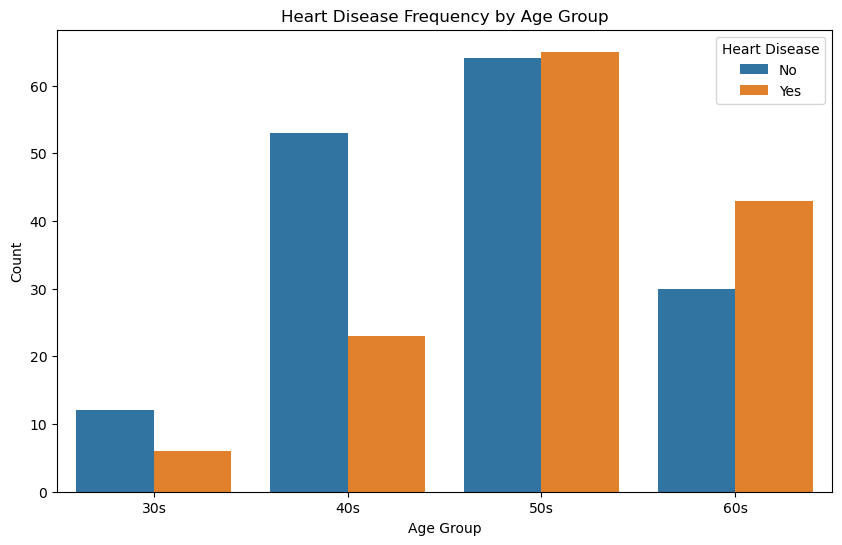

In [25]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[30, 40, 50, 60, 70], labels=['30s', '40s', '50s', '60s'])

# Count plot
sns.countplot(x='age_group', hue='target', data=df)
plt.title('Heart Disease Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


#### Cholesterol vs. Heart Disease


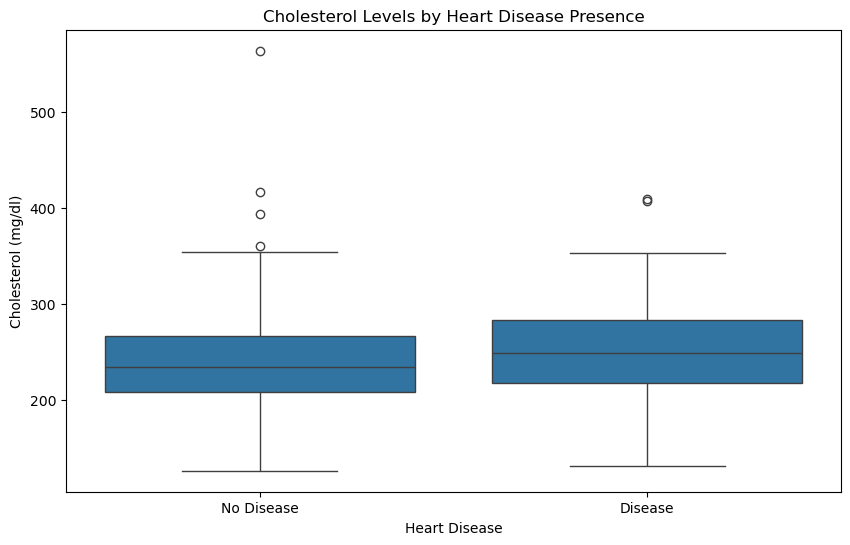

In [29]:
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol (mg/dl)')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()


#### Heart Disease by Chest Pain Type

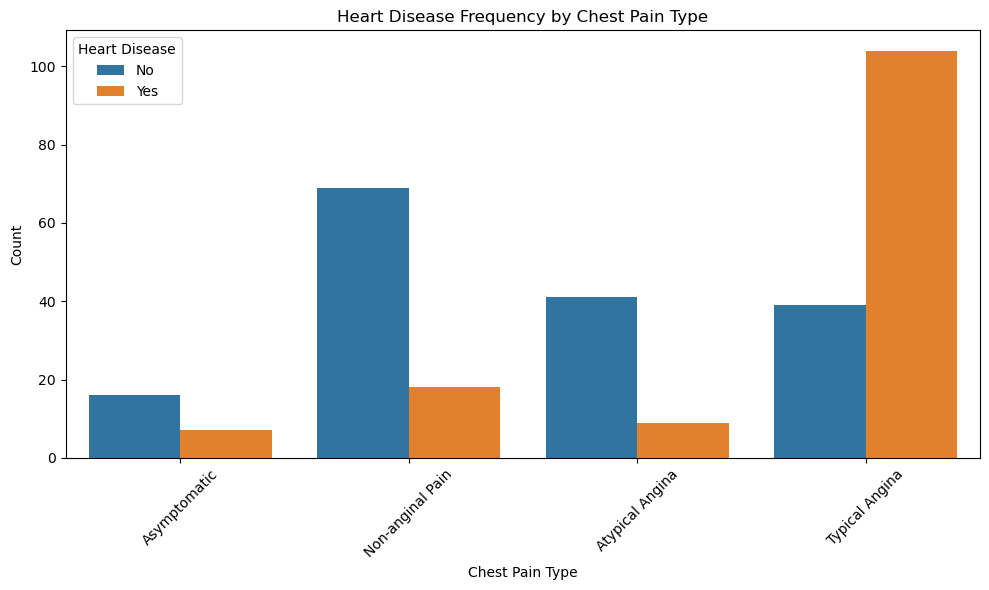

In [32]:
# Ensure chest pain type has been decoded to readable labels
sns.countplot(x='cp', hue='target', data=df)
plt.title('Heart Disease Frequency by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Correlation Heatmap

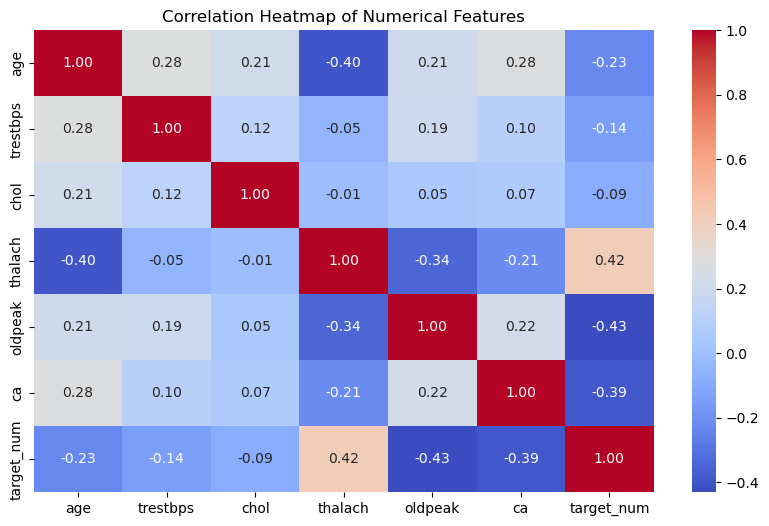

In [37]:
# Convert target back to 0/1 if you used strings earlier
df['target_num'] = df['target'].map({'No Disease': 0, 'Disease': 1})

# Correlation matrix (numerical columns only)
corr = df.select_dtypes(include='number').corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


#### Logistic Regression Model to Predict Heart Disease

In [40]:


# Use numeric version of target
df['target_num'] = df['target'].map({'No Disease': 0, 'Disease': 1})

# Drop non-numeric and label columns
X = df.select_dtypes(include='number').drop(['target_num'], axis=1)
y = df['target_num']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Save model
joblib.dump(log_model, 'logistic_model.pkl')

# Evaluate
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7912087912087912
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



#### Feature Importance with RandomForestClassifier

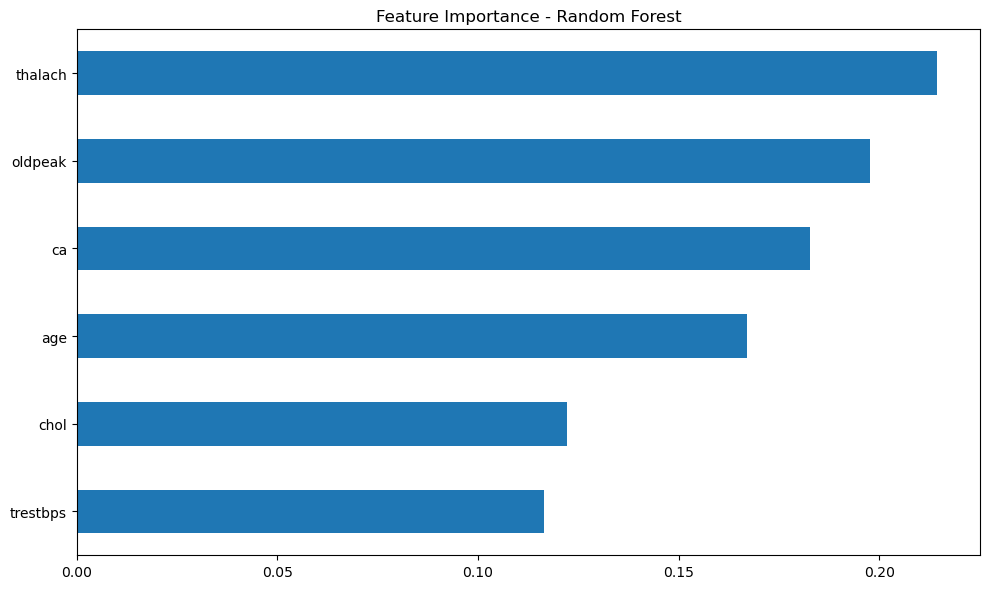

In [43]:


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


#### K-Means Clustering of Patients

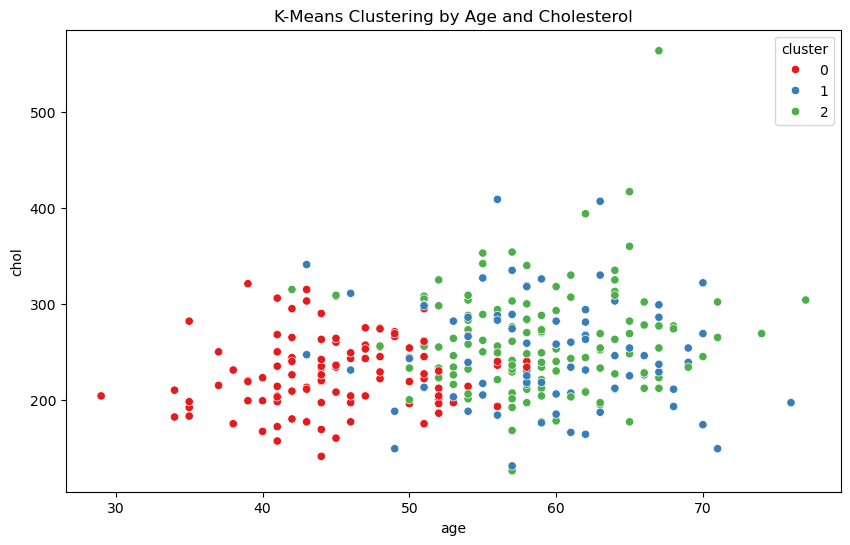

In [46]:

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters by two important features
sns.scatterplot(x=df['age'], y=df['chol'], hue=df['cluster'], palette='Set1')
plt.title("K-Means Clustering by Age and Cholesterol")
plt.show()


#### Build a Simple Flask API

In [51]:
# save it with flask_api.py
from flask import Flask, request, jsonify
import numpy as np
import joblib

app = Flask(__name__)
model = joblib.load("logistic_model.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = np.array([list(data.values())])
    prediction = model.predict(features)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


# python flask_api.py

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\DELL\anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


#### Build a Streamlit Frontend

In [56]:
import streamlit as st
import requests

st.title("🫀 Heart Attack Risk Predictor")

inputs = {}
inputs['age'] = st.number_input("Age", 20, 100, 50)
inputs['sex'] = st.selectbox("Sex", [0, 1])
inputs['cp'] = st.selectbox("Chest Pain Type", [0, 1, 2, 3])
inputs['trestbps'] = st.number_input("Resting BP", 80, 200, 120)
inputs['chol'] = st.number_input("Cholesterol", 100, 600, 200)
inputs['fbs'] = st.selectbox("Fasting Blood Sugar > 120?", [0, 1])
inputs['restecg'] = st.selectbox("Rest ECG", [0, 1, 2])
inputs['thalach'] = st.number_input("Max Heart Rate", 70, 210, 150)
inputs['exang'] = st.selectbox("Exercise-induced Angina?", [0, 1])
inputs['oldpeak'] = st.number_input("ST Depression", 0.0, 6.0, 1.0)
inputs['slope'] = st.selectbox("Slope of ST Segment", [0, 1, 2])
inputs['ca'] = st.selectbox("Number of Vessels Colored", [0, 1, 2, 3])
inputs['thal'] = st.selectbox("Thalassemia", [1, 2, 3])

if st.button("Predict Heart Disease"):
    try:
        response = requests.post("http://localhost:5000/predict", json=inputs)
        result = response.json()['prediction']
        st.success("Prediction: " + ("Disease Risk" if result == 1 else "No Disease"))
    except:
        st.error("API not available. Start Flask first.")

# streamlit run app.py